In [1]:
import sys
import os
import numpy as np

project_root = os.path.abspath("..")  # If notebooks is one folder above src
if project_root not in sys.path:
    sys.path.insert(0, project_root)

In [5]:
import torch
from src.energy.GMM import GaussianMixture
from src.energy.quadratic import QuadraticEnergy

In [6]:
weights = torch.tensor([0.5, 0.4, 0.1])
means = torch.tensor([[5, 5], [-2, 5], [-2,-2]], dtype=torch.float32)
covs = torch.tensor([[[1, 0], [0, 1]], [[1,0],[0,1]], [[1, 0], [0, 1]]], dtype=torch.float32)

In [7]:
#td = GaussianMixture(weights, means, covs)
td = QuadraticEnergy(torch.eye(2))

In [10]:
samples = td.exact_sample((1000,))

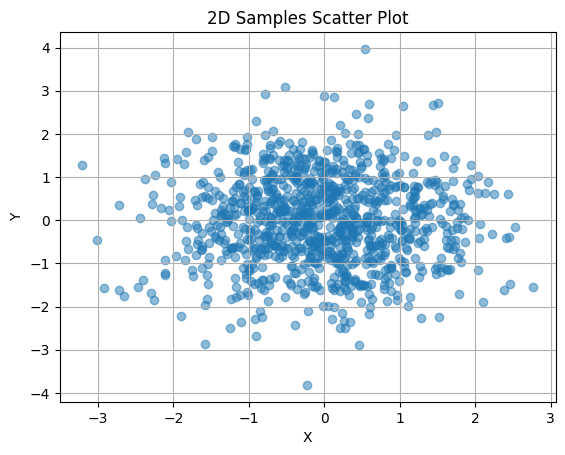

In [11]:
import matplotlib.pyplot as plt

def plot_2d_samples(samples):
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('2D Samples Scatter Plot')
    plt.grid(True)
    plt.show()

# Example usage
plot_2d_samples(samples)

In [12]:
td.forward(samples[:10])

tensor([4.9231, 2.1254, 3.7581, 3.2144, 2.1105, 5.9094, 4.7361, 3.2454, 1.9689,
        3.2958])

In [13]:
td.grad(samples[:1])

tensor([[ 2.4532, -0.3905]])

In [14]:
td.grad(samples[:10])

tensor([[ 2.4532, -0.3905],
        [ 0.7579, -0.0246],
        [-1.0405,  1.6607],
        [ 0.2074, -1.6462],
        [ 0.5918, -0.4415],
        [-2.2948, -1.6962],
        [ 1.3804,  1.9725],
        [ 1.6124, -0.4638],
        [-0.1878, -0.4762],
        [ 1.6919, -0.2306]])

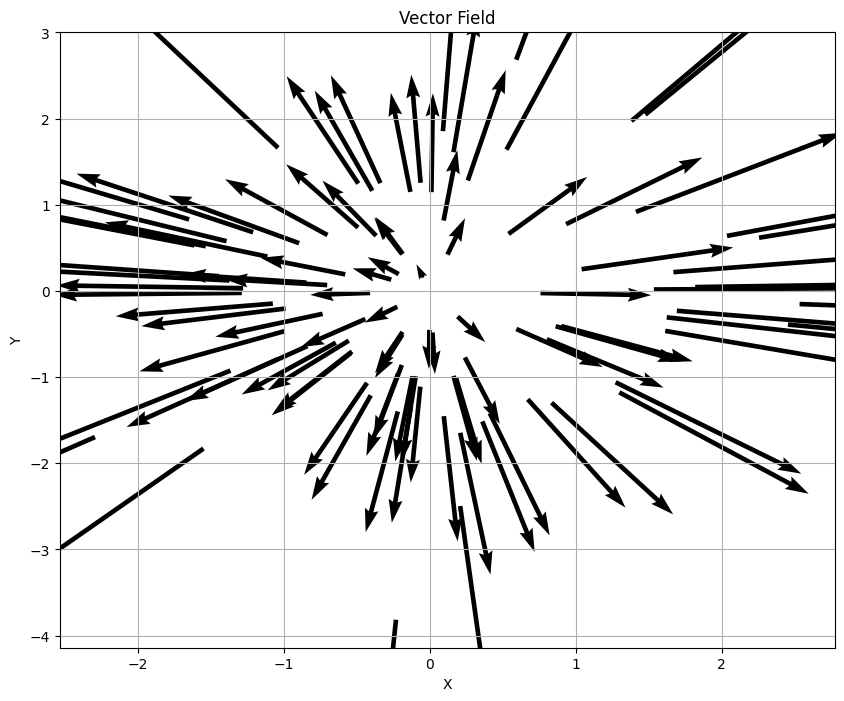

In [15]:
def plot_vector_field(samples, vectors):
    plt.figure(figsize=(10, 8))
    plt.quiver(samples[:, 0], samples[:, 1], vectors[:, 0], vectors[:, 1], angles='xy', scale_units='xy', scale=1)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Vector Field')
    plt.grid(True)
    plt.show()

n=100
plot_vector_field(samples[:n], td.grad(samples[:n]))

In [16]:
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
random_samples = torch.randn(10, 2)

# Evaluate gradients using td.grad function
grad_td = td.grad(random_samples)

# Evaluate gradients using torch.autograd.grad function
random_samples.requires_grad_(True)
output = td.forward(random_samples)
grad_autograd = torch.autograd.grad(outputs=output, inputs=random_samples, grad_outputs=torch.ones_like(output))[0]

# Compare the gradients
print("Gradients using td.grad function:\n", grad_td)
print("Gradients using torch.autograd.grad function:\n", grad_autograd)
print("Difference between the gradients:\n", grad_td - grad_autograd)

Gradients using td.grad function:
 tensor([[-0.6384, -0.0897],
        [ 0.1668,  0.1800],
        [-0.8252,  0.3095],
        [-2.3405,  1.3465],
        [-0.7789, -1.4108],
        [ 1.3075,  1.4730],
        [ 0.7313, -0.1001],
        [ 0.6321,  0.1351],
        [ 0.1640, -0.5393],
        [ 0.6271, -1.0162]])
Gradients using torch.autograd.grad function:
 tensor([[-0.6384, -0.0897],
        [ 0.1668,  0.1800],
        [-0.8252,  0.3095],
        [-2.3405,  1.3465],
        [-0.7789, -1.4108],
        [ 1.3075,  1.4730],
        [ 0.7313, -0.1001],
        [ 0.6321,  0.1351],
        [ 0.1640, -0.5393],
        [ 0.6271, -1.0162]])
Difference between the gradients:
 tensor([[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]])


In [17]:
def ftest(x):
    return (x**2).sum(axis=-1)
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
torch.random.manual_seed(0)
random_samples = torch.randn(3, 2)
print(random_samples)

# Evaluate gradients using td.grad function
random_samples.requires_grad_(True)
out = ftest(random_samples)
grad_vec = torch.ones_like(out)
grad_vec2 = torch.zeros_like(out)
print(out)
grad_vec2[0] = 1    
out.backward(grad_vec2)
print(random_samples.grad)
print("True gradients of ftest:\n", 2*random_samples)


tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])
tensor([2.4608, 5.0702, 3.1323], grad_fn=<SumBackward1>)
tensor([[ 3.0820, -0.5869],
        [-0.0000,  0.0000],
        [-0.0000, -0.0000]])
True gradients of ftest:
 tensor([[ 3.0820, -0.5869],
        [-4.3576,  1.1369],
        [-2.1690, -2.7972]], grad_fn=<MulBackward0>)


In [18]:
def ftest2(x):
    return (x**2)
# Checking if two procedures are equivalent
# Generate a random tensor of size 10 x 2
torch.random.manual_seed(0)
random_samples = torch.randn(3, 2)
print(random_samples)

# Evaluate gradients using td.grad function
random_samples.requires_grad_(True)
out = ftest2(random_samples)
print(out)
grad_vec = torch.ones_like(out)
print(grad_vec)
out.backward(grad_vec)
print(random_samples.grad)


tensor([[ 1.5410, -0.2934],
        [-2.1788,  0.5684],
        [-1.0845, -1.3986]])
tensor([[2.3747, 0.0861],
        [4.7471, 0.3231],
        [1.1762, 1.9561]], grad_fn=<PowBackward0>)
tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])
tensor([[ 3.0820, -0.5869],
        [-4.3576,  1.1369],
        [-2.1690, -2.7972]])


In [19]:
from torch.autograd import Variable
import torch
x = Variable(torch.FloatTensor([[1, 2, 3, 4]]), requires_grad=True)
z = 2*x
z[0, 0] += x[0, 1]
loss = z.sum(dim=1)

# do backward for first element of z
z.backward(torch.FloatTensor([[1, 0, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_() #remove gradient in x.grad, or it will be accumulated

# do backward for second element of z
z.backward(torch.FloatTensor([[0, 1, 0, 0]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# do backward for all elements of z, with weight equal to the derivative of
# loss w.r.t z_1, z_2, z_3 and z_4
z.backward(torch.FloatTensor([[1, 1, 1, 1]]), retain_graph=True)
print(x.grad.data)
x.grad.data.zero_()

# or we can directly backprop using loss
loss.backward() # equivalent to loss.backward(torch.FloatTensor([1.0]))
print(x.grad.data)

tensor([[2., 1., 0., 0.]])
tensor([[0., 2., 0., 0.]])
tensor([[2., 3., 2., 2.]])
tensor([[2., 3., 2., 2.]])
